# Generalization

# Can network fit random labels

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable
import copy#
import tensorflow as tf
from torchvision import transforms, datasets
import torch.optim as optim


2024-09-19 14:53:54.839370: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 14:53:54.855530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 14:53:54.874477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 14:53:54.879982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 14:53:54.894250: I tensorflow/core/platform/cpu_feature_guar

In [2]:
torch.manual_seed(1)

train_dataset = tv.datasets.MNIST(root='./data', train=True, transform=transforms.Compose([transforms.ToTensor(),]),
                                           download=True,)
                                          
test_dataset = tv.datasets.MNIST(root='./data', train=False, transform=transforms.Compose([transforms.ToTensor(),]))

In [3]:
randomLabel = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = randomLabel


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [4]:
class RMNIST(nn.Module):
    def __init__(self):
        super(RMNIST, self).__init__()
        
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 10)
        

    def forward(self, x):

        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
def trainFunction(model, optimizer, epoch, train_loader, interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0
    

    for i, (data, target) in enumerate(train_loader):
         
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        prediction = model(data)
        loss = loss_fn(prediction, target)
        
        loss.backward()
        
        optimizer.step()

        _, predicted = torch.max(prediction.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        
        if i % interval == 0:
            print (f'Train Log:Epoch: {epoch}, Step [{i+1}/{len(train_loader.dataset)}], TrainLoss: {loss.item():.4f}')
    return loss.data, round(acc,2)


In [6]:
def testFunction(model, epoch, test_loader):
    test_load = test_loader
    model.eval()
    n_correct = 0
    n_samples = 0
    testLoss = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
    
            prediction = model(images)
            testLoss += loss_func(prediction,labels).item()
            _,predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            count += 1
            n_correct += (predicted == labels).sum().item()
    
        Test_loss = testLoss/count
        netTest_acc1 = 100.0 * n_correct / n_samples
        print(f'Accuracy of the network on the test images: {netTest_acc1}% & Test Loss: {Test_loss}')
    return netTest_acc1, Test_loss

In [7]:
rmnist = RMNIST()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rmnist.parameters(), lr=0.0001)

In [8]:
a=[]
for i in rmnist.parameters():
    a.append(torch.numel(i))
print('Total no of parameters in Model 1:', np.sum(a),)

Total no of parameters in Model 1: 397510


In [14]:
train_loss_arr = []
test_loss_arr = []
epochs = 1000
interval = 1000
for epoch in range(1, epochs + 1):
    loss, acc = trainFunction(rmnist, optimizer, epoch, train_loader, interval)
    train_loss_arr.append(loss.detach().numpy())
    testAcc,testloss = testFunction(rmnist, epoch, test_loader)
    test_loss_arr.append(testloss)

Train Log:Epoch: 1, Step [1/60000], TrainLoss: 1.6796
Accuracy of the network on the test images: 10.99% & Test Loss: 2.6732133340835573
Train Log:Epoch: 2, Step [1/60000], TrainLoss: 1.5587
Accuracy of the network on the test images: 9.92% & Test Loss: 2.7308169865608214
Train Log:Epoch: 3, Step [1/60000], TrainLoss: 1.5423
Accuracy of the network on the test images: 10.0% & Test Loss: 2.7260882568359377
Train Log:Epoch: 4, Step [1/60000], TrainLoss: 1.5915
Accuracy of the network on the test images: 10.62% & Test Loss: 2.701612856388092
Train Log:Epoch: 5, Step [1/60000], TrainLoss: 1.6164
Accuracy of the network on the test images: 11.08% & Test Loss: 2.688232777118683
Train Log:Epoch: 6, Step [1/60000], TrainLoss: 1.5657
Accuracy of the network on the test images: 11.0% & Test Loss: 2.6929012870788576
Train Log:Epoch: 7, Step [1/60000], TrainLoss: 1.4501
Accuracy of the network on the test images: 11.56% & Test Loss: 2.664865174293518
Train Log:Epoch: 8, Step [1/60000], TrainLoss: 

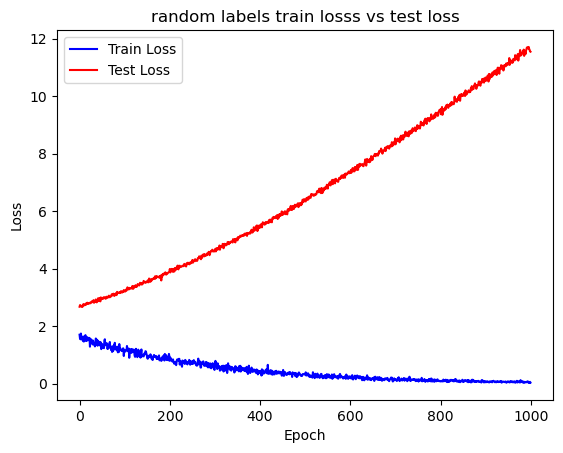

In [15]:
plt.plot(train_loss_arr,color="Blue")
plt.plot(test_loss_arr,color="red")
plt.legend(['Train Loss','Test Loss'],loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("random labels train losss vs test loss")

plt.show()